<a href="https://colab.research.google.com/github/brian-untar/BigData/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import scipy
import folium
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
UAS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMT 5/UAS/Suicide.csv")

In [4]:
print('Jumlah sampel: ', UAS.shape[0])
print('Jumlah variabel (kolom): ', UAS.shape[1])

Jumlah sampel:  27820
Jumlah variabel (kolom):  12


In [5]:
nama_kolom = UAS.columns
nama_kolom

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
UAS.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
UAS.isna().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


In [8]:
UAS.isna().sum()/len(UAS)*100

,0
country,0.000000
year,0.000000
sex,0.000000
age,0.000000
suicides_no,0.000000
population,0.000000
suicides/100k pop,0.000000
country-year,0.000000
HDI for year,69.935298
gdp_for_year ($),0.000000


In [9]:
duplicated = UAS.duplicated().sum()
print ("There are %d duplicated records" %(duplicated))

There are 0 duplicated records


In [10]:
UAS1 = UAS.drop(['HDI for year'], axis = 1)

In [11]:
UAS1.isna().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
gdp_for_year ($),0
gdp_per_capita ($),0


In [12]:
def categorize_age(age):
    if "5-14" in age:
        return "Anak"
    elif "15-24" in age:
        return "Remaja"
    elif "25-34" in age:
        return "Dewasa Muda"
    elif "35-54" in age:
        return "Dewasa"
    elif "55-74" in age:
        return "Pra Lansia"
    elif "75+" in age:
        return "Lansia"
    else:
        return "Unknown"

UAS1["age_category"] = UAS1["age"].apply(categorize_age)


In [13]:
UAS1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,age_category
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Remaja
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Dewasa
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Remaja
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Lansia
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Dewasa Muda


In [14]:
UAS1.isna().sum()/len(UAS)*100

,0
country,0.0
year,0.0
sex,0.0
age,0.0
suicides_no,0.0
population,0.0
suicides/100k pop,0.0
country-year,0.0
gdp_for_year ($),0.0
gdp_per_capita ($),0.0


In [15]:
duplicated = UAS1.duplicated().sum()
print ("There are %d duplicated records" %(duplicated))

There are 0 duplicated records


In [16]:
cols = ['population', 'suicides_no']

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(UAS1[cols])

normalized_UAS1 = pd.DataFrame(scaled_values, columns=[c + '_scaled' for c in cols])

comparison_table = pd.concat([UAS1[cols].reset_index(drop=True), normalized_UAS1], axis=1)

comparison_table.head(10)

,population,suicides_no,population_scaled,suicides_no_scaled
0,312900,21,0.007137,0.000940
1,308000,16,0.007025,0.000716
2,289700,14,0.006607,0.000627
3,21800,1,0.000491,0.000045
4,274300,9,0.006256,0.000403
5,35600,1,0.000806,0.000045
6,278800,6,0.006358,0.000269
7,257200,4,0.005865,0.000179
8,137500,1,0.003133,0.000045
9,311000,0,0.007093,0.000000


In [17]:
UAS1['suicide_rate_per_100k'] = (UAS1['suicides_no'] / UAS1['population']) * 100000

feature_table = UAS1[['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicide_rate_per_100k']]

feature_table.head(10)

,country,year,sex,age,suicides_no,population,suicide_rate_per_100k
0,Albania,1987,male,15-24 years,21,312900,6.711409
1,Albania,1987,male,35-54 years,16,308000,5.194805
2,Albania,1987,female,15-24 years,14,289700,4.832585
3,Albania,1987,male,75+ years,1,21800,4.587156
4,Albania,1987,male,25-34 years,9,274300,3.281079
5,Albania,1987,female,75+ years,1,35600,2.808989
6,Albania,1987,female,35-54 years,6,278800,2.152080
7,Albania,1987,female,25-34 years,4,257200,1.555210
8,Albania,1987,male,55-74 years,1,137500,0.727273
9,Albania,1987,female,5-14 years,0,311000,0.000000


In [18]:
grouped_table = UAS1.groupby(['country', 'sex', 'year'], as_index=False).agg({
    'suicides_no': 'sum',
    'population': 'sum',
    'suicide_rate_per_100k': 'mean'
})

grouped_table.head(15)


,country,sex,year,suicides_no,population,suicide_rate_per_100k
0,Albania,female,1987,25,1316900,1.891477
1,Albania,female,1988,22,1343600,2.257704
2,Albania,female,1989,15,1363300,0.918701
3,Albania,female,1992,14,1423200,0.852550
4,Albania,female,1993,27,1427400,1.627701
5,Albania,female,1994,15,1445100,1.637389
6,Albania,female,1995,34,1473800,2.677648
7,Albania,female,1996,39,1496000,2.910533
8,Albania,female,1997,52,1528900,3.547459
9,Albania,female,1998,58,1537300,3.389920


In [19]:
file = "UAS.csv"
UAS1.to_csv(file, index=False)

In [20]:
DB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMT 5/UAS/UAS.csv")

In [21]:
DB.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,age_category,suicide_rate_per_100k
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Remaja,6.711409
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Dewasa,5.194805
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Remaja,4.832585
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Lansia,4.587156
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Dewasa Muda,3.281079


In [22]:
DB['suicide_rate_per_100k'] = pd.to_numeric(DB['suicide_rate_per_100k'], errors='coerce')

In [23]:
DB = DB.dropna(subset=['country', 'year', 'suicide_rate_per_100k'])

In [24]:
country_mean = (
    DB.groupby('country')['suicide_rate_per_100k']
    .mean()
    .sort_values(ascending=False)
)

In [25]:
top5 = country_mean.head(5).index.tolist()
"Top 5 negara:", top5

('Top 5 negara:',
 ['Lithuania', 'Sri Lanka', 'Russian Federation', 'Hungary', 'Belarus'])

In [26]:
subset = DB[DB['country'].isin(top5)]

In [27]:
trend = (
    subset.groupby(['year', 'country'])['suicide_rate_per_100k']
    .mean()
    .reset_index()
)

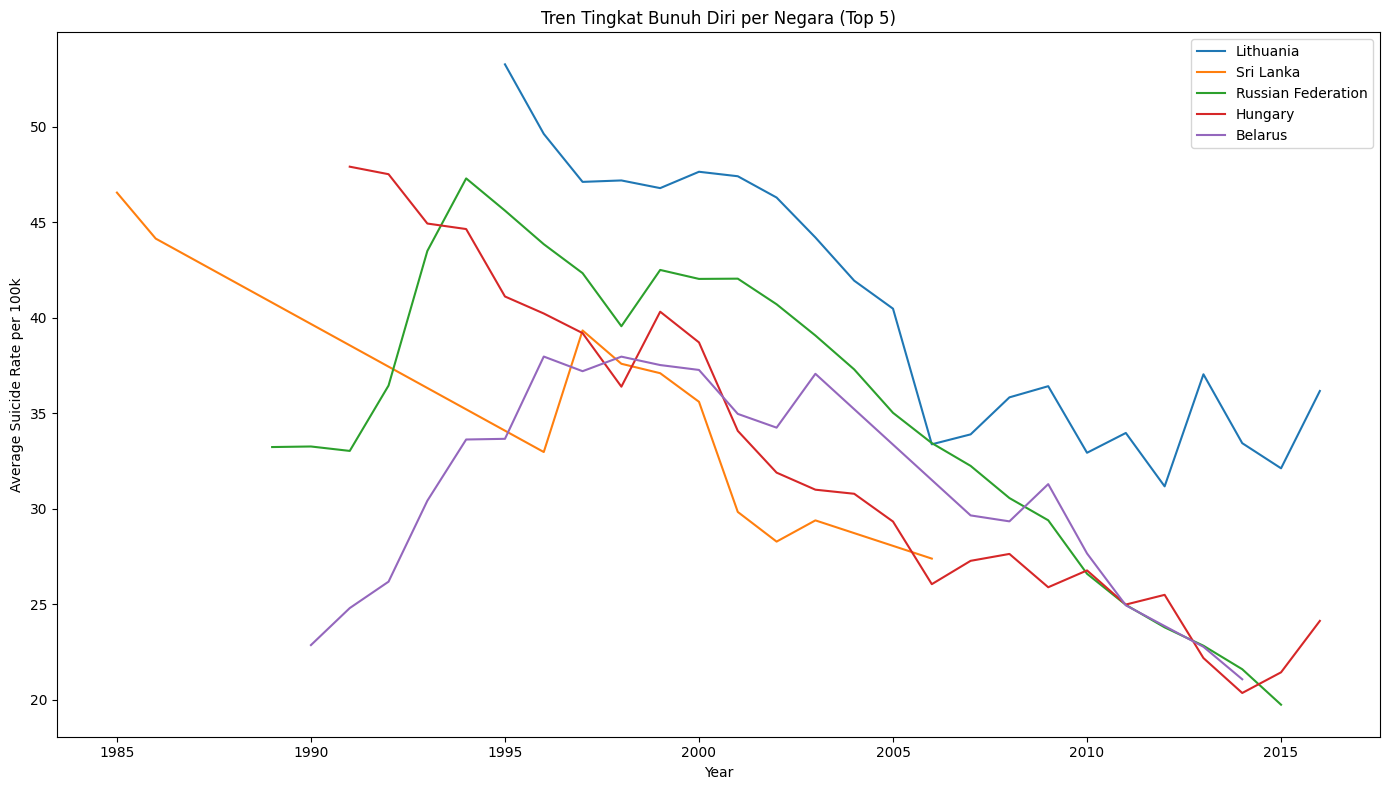

In [28]:
plt.figure(figsize=(14, 8))
for country in top5:
    data_country = trend[trend['country'] == country]
    plt.plot(data_country['year'], data_country['suicide_rate_per_100k'], label=country)
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Tren Tingkat Bunuh Diri per Negara (Top 5)')
plt.legend()
plt.tight_layout()
plt.show()

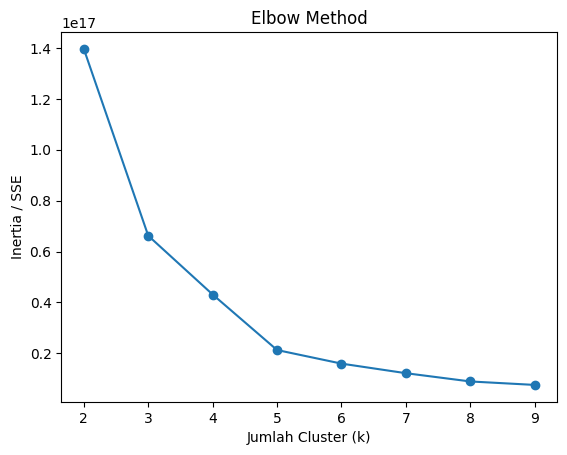

In [29]:
X = DB.select_dtypes(include=np.number)
X = X.fillna(0)

distortions = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia / SSE')
plt.title('Elbow Method')
plt.show()


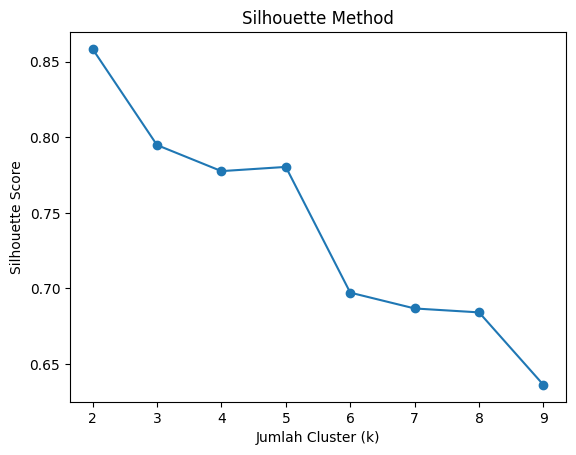

In [30]:
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
DB['cluster'] = kmeans.fit_predict(X)

In [32]:
DB.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,age_category,suicide_rate_per_100k,cluster
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Remaja,6.711409,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Dewasa,5.194805,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Remaja,4.832585,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Lansia,4.587156,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Dewasa Muda,3.281079,0


In [33]:
DB["generation"].value_counts()

,count
generation,
Generation X,6408
Silent,6364
Millenials,5844
Boomers,4990
G.I. Generation,2744
Generation Z,1470


In [34]:
DB["age"].groupby(DB["generation"]).value_counts()

generation       age        
Boomers          35-54 years    3030
                 25-34 years    1154
                 55-74 years     806
G.I. Generation  75+ years      2114
                 55-74 years     630
Generation X     25-34 years    2682
                 15-24 years    2114
                 35-54 years     982
                 5-14 years      630
Generation Z     5-14 years     1470
Millenials       15-24 years    2528
                 5-14 years     2510
                 25-34 years     806
Silent           55-74 years    3206
                 75+ years      2528
                 35-54 years     630
Name: count, dtype: int64

In [35]:
DB["age"].groupby(DB["age_category"]).value_counts()

,,count
age_category,age,
Anak,5-14 years,4610
Dewasa,35-54 years,4642
Dewasa Muda,25-34 years,4642
Lansia,75+ years,4642
Pra Lansia,55-74 years,4642
Remaja,15-24 years,4642


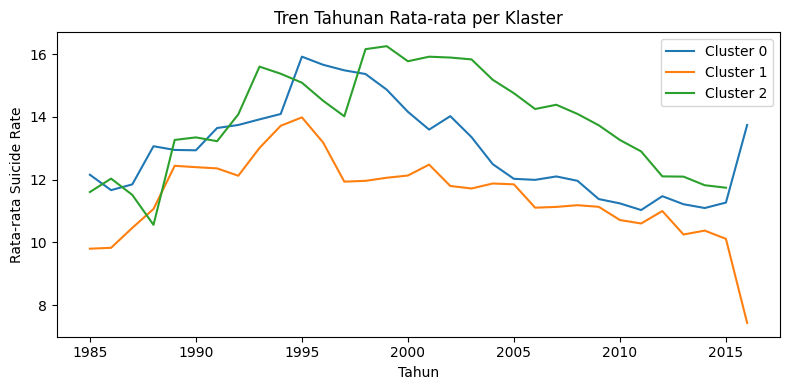

In [36]:
grp = DB.groupby(['cluster','year'])['suicide_rate_per_100k'].agg(['mean']).reset_index()

plt.figure(figsize=(8,4))
for c in sorted(grp['cluster'].unique()):
    tmp = grp[grp['cluster'] == c]
    plt.plot(tmp['year'], tmp['mean'], label=f'Cluster {c}')

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Suicide Rate')
plt.title('Tren Tahunan Rata-rata per Klaster')
plt.legend()
plt.tight_layout()
plt.show()


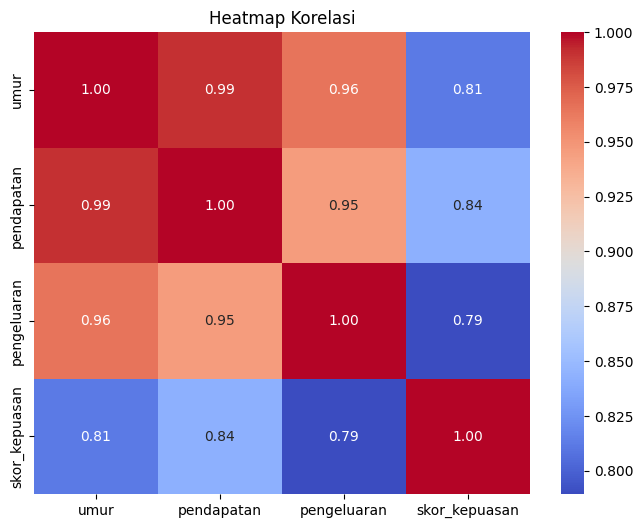

In [37]:
data = {
    'umur': [23, 45, 31, 35, 40, 29, 50],
    'pendapatan': [5000, 8000, 6000, 6500, 7000, 5500, 9000],
    'pengeluaran': [2000, 3000, 2500, 2800, 2900, 2200, 3200],
    'skor_kepuasan': [7, 9, 8, 7, 8, 6, 9]
}
DB = pd.DataFrame(data)

corr_matrix = DB.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

/tmp/ipython-input-3444428714.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='generation', y='suicide_rate_per_100k', data=DB, palette='viridis', ci=None)
/tmp/ipython-input-3444428714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='suicide_rate_per_100k', data=DB, palette='viridis', ci=None)


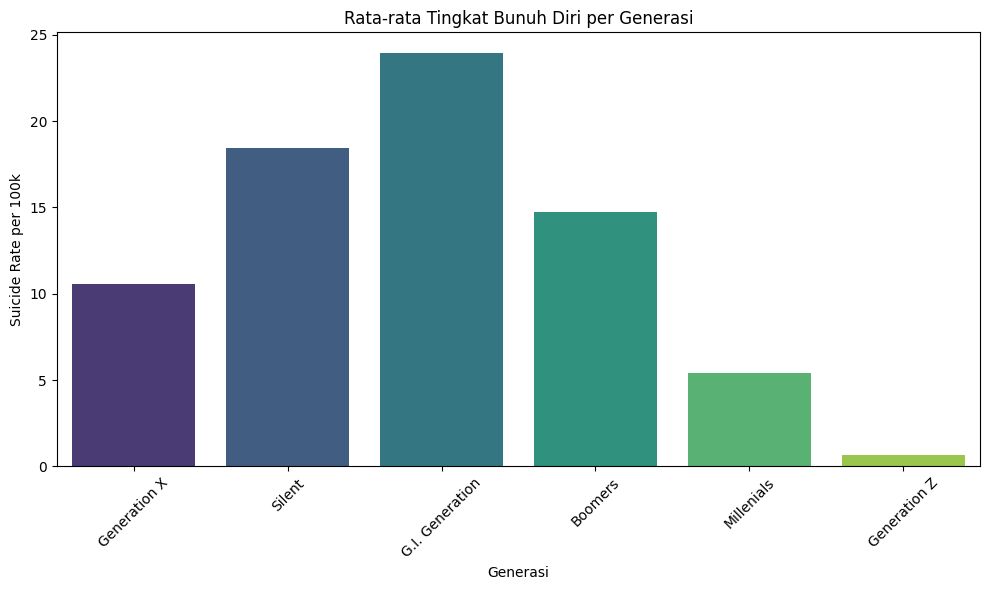

/tmp/ipython-input-3444428714.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_category', y='suicide_rate_per_100k', data=DB, palette='coolwarm')


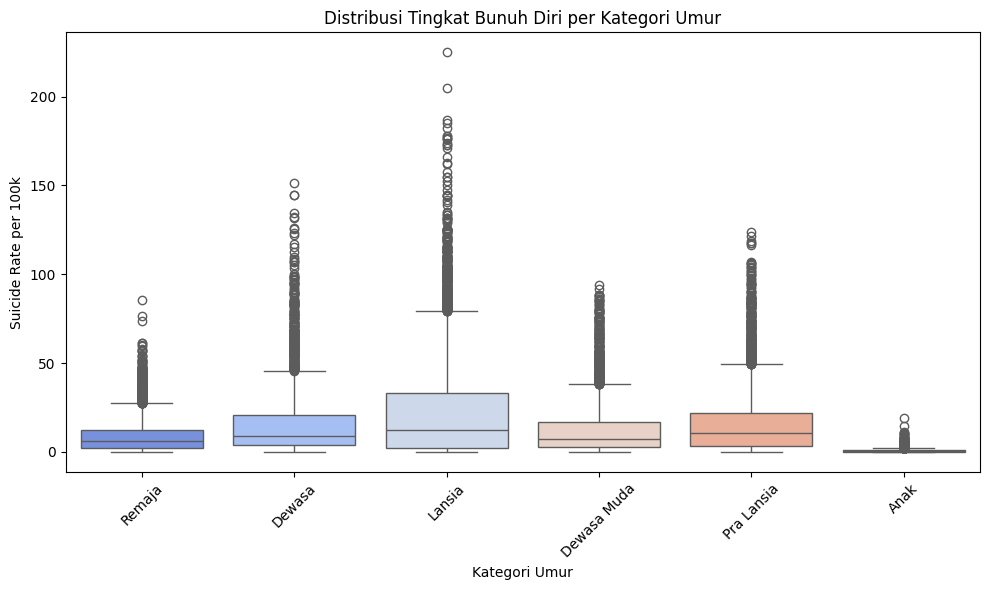

In [38]:
DB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMT 5/UAS/UAS.csv")

plt.figure(figsize=(10,6))
sns.barplot(x='generation', y='suicide_rate_per_100k', data=DB, palette='viridis', ci=None)
plt.title('Rata-rata Tingkat Bunuh Diri per Generasi')
plt.xlabel('Generasi')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='age_category', y='suicide_rate_per_100k', data=DB, palette='coolwarm')
plt.title('Distribusi Tingkat Bunuh Diri per Kategori Umur')
plt.xlabel('Kategori Umur')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
generation_count = DB["generation"].value_counts().reset_index()
generation_count.columns = ["Generation", "Total_Data"]
print(generation_count)


        Generation  Total_Data
0     Generation X        6408
1           Silent        6364
2       Millenials        5844
3          Boomers        4990
4  G.I. Generation        2744
5     Generation Z        1470
